In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

C:\Users\adity\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


In [3]:
data=pd.read_csv("CREDIT CARD USERS DATA.csv")

C:\Users\adity\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dictionary=pd.read_excel("CREDIT CARD USERS DATA.xlsx","Data Dictionary")

In [5]:
cat=dictionary[dictionary['Categorical Variable'].isnull()==False]['Categorical Variable']

In [6]:
for col in data.columns:  #Replacing the string #NULL! with NaN values
    data[col]=data[col].replace('#NULL!',np.nan)

In [7]:
data[cat].head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1.0,2.00,1.0,2.0,September,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.0,5.00,0.0,2.0,May,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3.0,4.00,1.0,6.0,June,2.0,2.0,0.0,16.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,3.00,0.0,2.0,May,3.0,2.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2.0,2.00,0.0,3.0,July,3.0,2.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
for col in data.columns:
    print(data[col].value_counts())

2112-BLMNMM-7XR    1
5463-AWTLNK-F25    1
9506-MCBRGQ-4YC    1
4086-MRSPNN-LP6    1
5889-BJQZUO-DKF    1
9591-DHXYZG-V8E    1
2487-LLEKYF-P0D    1
0630-MSYWGK-1YX    1
9114-RKFWAX-CQ6    1
1336-ITNYBO-UNI    1
5213-FLCFRD-ESG    1
1044-QRFUCQ-ROS    1
4620-PJTNNY-HPV    1
2125-VLQTZS-5BO    1
7150-VIJPXR-SP5    1
8512-RRDZYC-GKB    1
3560-TIKMPJ-4NV    1
6191-AHKBEP-ZF6    1
0114-BLSPYE-A8B    1
1618-FPIXBZ-90I    1
4888-TNZRYK-8YZ    1
9166-NBENKT-6SQ    1
9515-UKHWAK-X7X    1
1568-YJDIBX-U99    1
7056-HUMCNT-L6F    1
4265-ZALLCC-RMF    1
3473-SOLGJV-00C    1
6731-UKEQRV-6ZB    1
7723-RVLIHB-URK    1
4039-NPYLRF-XFJ    1
                  ..
1943-RXAEFL-BZ3    1
0531-QJKTZB-7S3    1
3486-WMIORP-0E7    1
8586-VGOASR-CYX    1
9141-FSAGHC-5LV    1
8138-NYSLTE-OQN    1
1386-HYBNQI-7UZ    1
9513-EFLYMG-UEA    1
9096-WDAHND-G6L    1
8188-QKPMHI-X11    1
5751-IXXZFS-3N7    1
9091-USJPYF-5PF    1
6578-HPNLCY-52E    1
1694-SXDBNI-CEI    1
6266-RPFUST-N4B    1
3689-QPFATZ-2YE    1
7139-ECRLZI-X

2.0     304
1.0     276
3.0     259
4.0     250
6.0     208
5.0     206
7.0     200
10.0    181
30.0    178
8.0     177
12.0    170
9.0     167
29.0    156
14.0    151
15.0    151
17.0    150
13.0    149
19.0    145
16.0    143
11.0    139
28.0    137
20.0    127
21.0    125
26.0    120
25.0    119
24.0    113
23.0    112
18.0    107
27.0    100
22.0     91
0.0      89
Name: card2tenure, dtype: int64
5.0    1923
2.0    1019
3.0     933
4.0     760
1.0     365
Name: card2tenurecat, dtype: int64
11.0    601
10.0    591
9.0     586
8.0     497
12.0    497
7.0     411
13.0    354
6.0     295
14.0    280
15.0    195
5.0     180
16.0    135
4.0     100
17.0     69
18.0     64
3.0      39
19.0     28
2.0      24
1.0      20
20.0     16
21.0      8
0.0       7
23.0      2
22.0      1
Name: carditems, dtype: int64
0.00       7
186.91     4
231.14     3
202.31     3
237.16     3
122.54     3
245.84     3
249.00     3
412.99     3
321.19     3
229.32     2
240.38     2
411.07     2
43.49      2
2

In [4]:
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,9662-FUSYIM-1IV,4.0,4.00,0.0,64.0,5.0,August,17.0,4.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7432-QKQFJJ-K72,2.0,5.00,1.0,52.0,5.0,July,14.0,2.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8959-RZWRHU-ST8,3.0,4.00,1.0,44.0,4.0,October,16.0,3.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9124-DZALHM-S6I,2.0,3.00,1.0,66.0,6.0,October,12.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,3512-MUWBGY-52X,2.0,2.00,0.0,47.0,4.0,July,11.0,1.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.columns.values

array(['custid', 'region', 'townsize', 'gender', 'age', 'agecat',
       'birthmonth', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat',
       'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt',
       'lncreddebt', 'othdebt', 'lnothdebt', 'default', 'jobsat',
       'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats',
       'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small',
       'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype',
       'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue',
       'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat',
       'commutetime', 'commutecar', 'commutemotorcycle', 'commutecarpool',
       'commutebus', 'commuterail', 'commutepublic', 'commutebike',
       'commutewalk', 'commutenonmotor', 'telecommute', 'reason',
       'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype',
       'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2',
       'card2type', 'ca

In [8]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
lnwireten,3656,73.12
lnwiremon,3656,73.12
lnequipmon,3296,65.92
lnequipten,3296,65.92
lntollten,2622,52.44
lntollmon,2622,52.44
lncardten,1422,28.44
lncardmon,1419,28.38
lnlongten,3,0.06
longten,3,0.06


In [9]:
data.drop(['lnwireten','lnwiremon','lnequipmon','lnequipten','lntollten','lntollmon'],axis=1,inplace=True) #Removing columns with more than 50% missing values

In [10]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
lncardten,1422,28.44
lncardmon,1419,28.38
lnlongten,3,0.06
longten,3,0.06
commutetime,2,0.04
cardten,2,0.04
townsize,2,0.04
lnothdebt,1,0.02
lncreddebt,1,0.02
pets_freshfish,0,0.00


In [11]:
from sklearn.preprocessing import Imputer #Imputing missing values
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(data[['lncardten']])
data['lncardten'] = imp_mean.transform(data[['lncardten']])

In [12]:
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(data[['lncardmon']])
data['lncardmon'] = imp_mean.transform(data[['lncardmon']])

In [13]:
data = data.dropna(how='any')
data.shape

(4994, 126)

In [14]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
response_03,0,0.0
carbuy,0,0.0
pets_small,0,0.0
pets_saltfish,0,0.0
pets_freshfish,0,0.0
homeown,0,0.0
hometype,0,0.0
address,0,0.0
addresscat,0,0.0
cars,0,0.0


In [15]:
data.index=data.custid

In [16]:
data.drop(columns={'custid'},axis=1,inplace=True)

In [17]:
target_variable=data['cardspent']+data['card2spent'] #Extracting our target variable

In [18]:
target_variable=target_variable.rename("target_variable")

In [19]:
data=data.join(target_variable)

In [20]:
data.drop(columns={'cardspent','card2spent'},inplace=True)

In [21]:
target_variable.head()

custid
3964-QJWTRG-NPN    149.46
0648-AIPJSP-UVM     77.54
5195-TLUDJE-HVO    359.97
4459-VLPQUH-3OL    359.41
8158-SMTQFB-CNO    507.83
Name: target_variable, dtype: float64

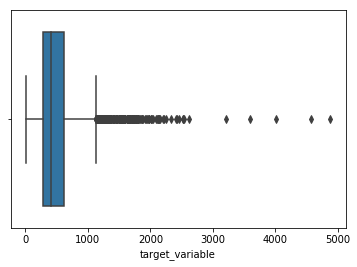

In [22]:
sns.boxplot(target_variable)

C:\Users\adity\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


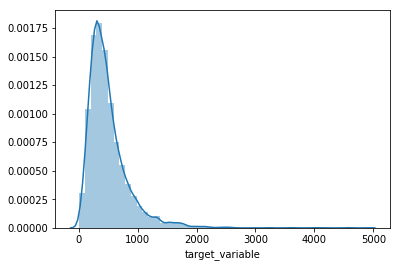

In [24]:
sns.distplot(target_variable)

In [23]:
data['target_variable']=np.log(data['target_variable'])

#### Exploratory Data Analysis

C:\Users\adity\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


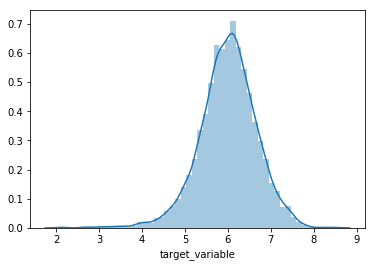

In [24]:
sns.distplot(data['target_variable'])

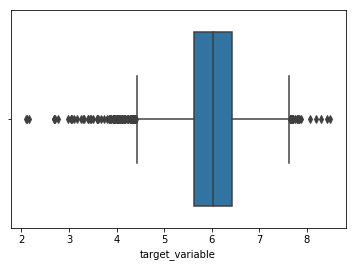

In [27]:
sns.boxplot(data['target_variable'])

In [25]:
data_num=data.drop(columns=cat,axis=1)

In [26]:
data_num

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,equipmon,equipten,cardmon,lncardmon,cardten,lncardten,wiremon,wireten,hourstv,target_variable
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,20.0,15.0,31.0,3.43,11.1,1.20,0.18,2.24,0.81,-1.0,...,29.50,126.10,14.25,2.660000,60.00,4.090000,0.00,0.00,13.0,5.007029
0648-AIPJSP-UVM,22.0,17.0,15.0,2.71,18.6,1.22,0.20,1.57,0.45,-1.0,...,54.85,1975.00,16.00,2.770000,610.00,6.410000,45.65,1683.55,18.0,4.350794
5195-TLUDJE-HVO,67.0,14.0,35.0,3.56,9.9,0.93,-0.07,2.54,0.93,13.0,...,0.00,0.00,23.00,3.140000,1410.00,7.250000,0.00,0.00,21.0,5.886021
4459-VLPQUH-3OL,23.0,16.0,20.0,3.00,5.7,0.02,-3.78,1.12,0.11,18.0,...,0.00,0.00,21.00,3.040000,685.00,6.530000,0.00,0.00,26.0,5.884464
8158-SMTQFB-CNO,26.0,16.0,23.0,3.14,1.7,0.21,-1.54,0.18,-1.74,13.0,...,0.00,0.00,17.25,2.850000,360.00,5.890000,19.05,410.80,27.0,6.230147
9662-FUSYIM-1IV,64.0,17.0,107.0,4.67,5.6,1.06,0.06,4.93,1.60,-1.0,...,35.50,970.95,28.25,3.340000,765.00,6.640000,0.00,0.00,21.0,5.430529
7432-QKQFJJ-K72,52.0,14.0,77.0,4.34,1.9,0.50,-0.69,0.96,-0.04,-1.0,...,0.00,0.00,0.00,2.909609,0.00,6.426193,0.00,0.00,19.0,6.859048
8959-RZWRHU-ST8,44.0,16.0,97.0,4.57,14.4,5.95,1.78,8.02,2.08,15.0,...,0.00,0.00,14.50,2.670000,630.00,6.450000,0.00,0.00,13.0,7.173805
9124-DZALHM-S6I,66.0,12.0,16.0,2.77,2.6,0.10,-2.28,0.31,-1.16,-1.0,...,0.00,0.00,15.50,2.740000,830.00,6.720000,0.00,0.00,25.0,6.148105


In [27]:
q1=data_num.quantile(0.25)
q3=data_num.quantile(0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [28]:
(data_num.columns)

Index(['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt',
       'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats',
       'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small',
       'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime',
       'carditems', 'card2items', 'tenure', 'longmon', 'lnlongmon', 'longten',
       'lnlongten', 'tollmon', 'tollten', 'equipmon', 'equipten', 'cardmon',
       'lncardmon', 'cardten', 'lncardten', 'wiremon', 'wireten', 'hourstv',
       'target_variable'],
      dtype='object')

In [29]:
ll.index

Index(['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'othdebt',
       'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds',
       'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish',
       'carvalue', 'carditems', 'card2items', 'tenure', 'longmon', 'lnlongmon',
       'tollmon', 'tollten', 'equipmon', 'equipten', 'cardmon', 'lncardmon',
       'lncardten', 'wiremon', 'wireten', 'hourstv', 'target_variable'],
      dtype='object')

In [30]:
num=list()
for a in data_num.columns:
    if a in ll.index:
        num.append(a)

In [31]:
data_num=data_num[num]

In [32]:
df = data_num[~((data_num < (q1 - 1.5 * iqr)) |(data_num > (q3 + 1.5 * iqr))).any(axis=1)]

In [33]:
df

,age,ed,income,lninc,debtinc,creddebt,othdebt,spoused,reside,pets,...,tollten,equipmon,equipten,cardmon,lncardmon,lncardten,wiremon,wireten,hourstv,target_variable
custid,,,,,,,,,,,,,,,,,,,,,
4459-VLPQUH-3OL,23.0,16.0,20.0,3.00,5.7,0.02,1.12,18.0,5.0,0.0,...,0.00,0.00,0.00,21.00,3.040000,6.530000,0.00,0.00,26.0,5.884464
9124-DZALHM-S6I,66.0,12.0,16.0,2.77,2.6,0.10,0.31,-1.0,1.0,1.0,...,0.00,0.00,0.00,15.50,2.740000,6.720000,0.00,0.00,25.0,6.148105
3512-MUWBGY-52X,47.0,11.0,84.0,4.43,4.1,1.77,1.67,-1.0,2.0,1.0,...,0.00,0.00,0.00,0.00,2.909609,6.426193,0.00,0.00,21.0,5.739182
8241-PWPONH-62O,33.0,8.0,19.0,2.94,0.9,0.13,0.04,9.0,5.0,6.0,...,0.00,0.00,0.00,0.00,2.909609,6.426193,0.00,0.00,27.0,5.974903
1705-NMIQNO-IC4,58.0,18.0,63.0,4.14,10.5,1.92,4.69,-1.0,1.0,0.0,...,1776.70,0.00,0.00,24.50,3.200000,7.250000,0.00,0.00,21.0,6.885959
2228-KOLOPU-FY3,28.0,11.0,23.0,3.14,4.8,0.19,0.91,12.0,3.0,10.0,...,1099.65,0.00,0.00,16.50,2.800000,6.300000,0.00,0.00,16.0,6.374650
0765-UXAFYM-PDR,61.0,16.0,35.0,3.56,10.1,1.23,2.30,12.0,2.0,0.0,...,0.00,0.00,0.00,9.50,2.250000,6.170000,0.00,0.00,25.0,6.239028
2525-OSULNV-0KS,36.0,19.0,30.0,3.40,15.5,0.41,4.24,-1.0,1.0,7.0,...,0.00,0.00,0.00,0.00,2.909609,6.426193,0.00,0.00,15.0,6.173515
4973-FHPBZQ-AAA,55.0,14.0,80.0,4.38,6.5,0.03,5.17,-1.0,1.0,9.0,...,0.00,0.00,0.00,22.25,3.100000,6.910000,0.00,0.00,25.0,6.142962


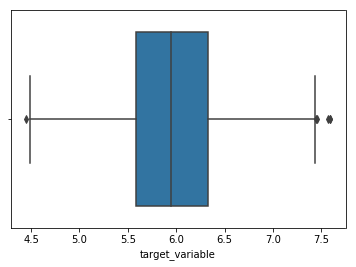

In [34]:
sns.boxplot(df['target_variable'])  #after outlier treatment and log transform

C:\Users\adity\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


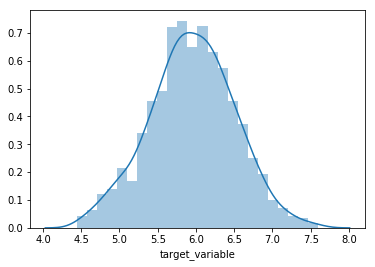

In [38]:
sns.distplot(df['target_variable'])

Text(0, 0.5, 'Credit spent on both cards')

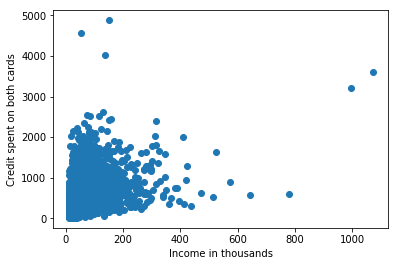

In [37]:
plt.scatter(data['income'],target_variable)
plt.xlabel('Income in thousands')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

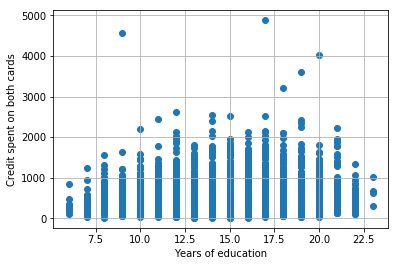

In [17]:
plt.scatter(data['ed'],target_variable)
plt.grid()
plt.xlabel('Years of education')
plt.ylabel('Credit spent on both cards')

In [18]:
data['jobcat'].value_counts()


2.0    1638
1.0    1388
6.0     686
3.0     619
5.0     451
4.0     212
Name: jobcat, dtype: int64

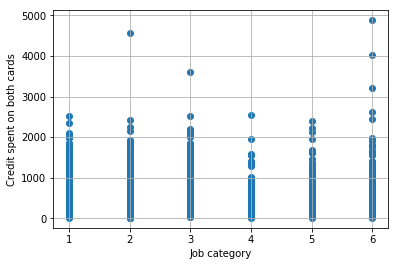

In [19]:
plt.grid()
plt.xlabel('Job category')
plt.ylabel('Credit spent on both cards')
plt.scatter(data['jobcat'],target_variable)

Text(0,0.5,'Credit spent on both cards')

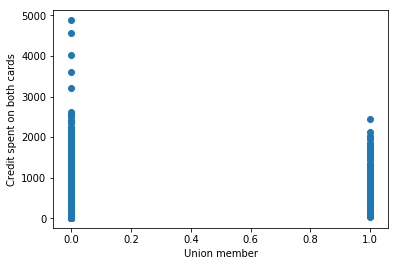

In [20]:
plt.scatter(data['union'],target_variable)
plt.xlabel('Union member')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

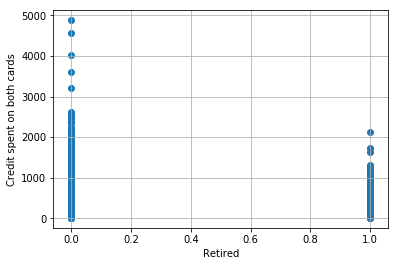

In [21]:
plt.grid()
plt.scatter(data['retire'],target_variable)
plt.xlabel('Retired')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

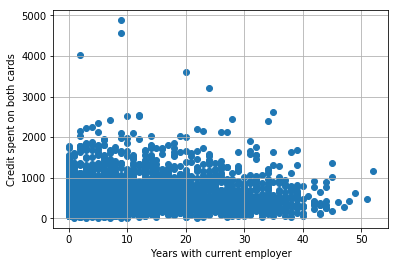

In [22]:
plt.grid()
plt.scatter(data['employ'],target_variable)
plt.xlabel('Years with current employer')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

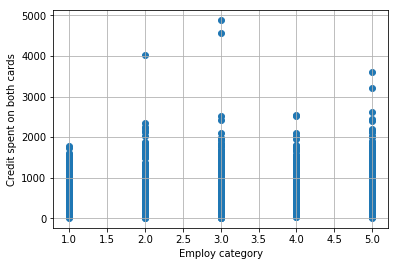

In [23]:
plt.grid()
plt.scatter(data['empcat'],target_variable)
plt.xlabel('Employ category')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

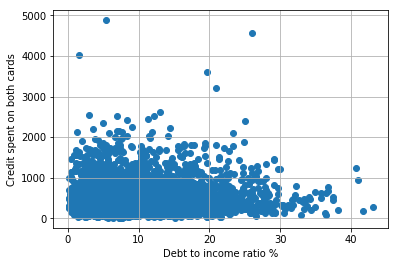

In [24]:
plt.grid()
plt.scatter(data['debtinc'],target_variable)
plt.xlabel('Debt to income ratio %')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

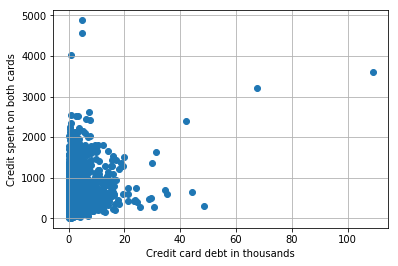

In [25]:
plt.grid()
plt.scatter(data['creddebt'],target_variable)
plt.xlabel('Credit card debt in thousands')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

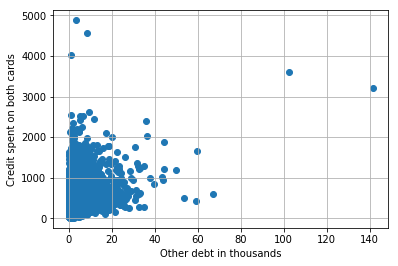

In [26]:
plt.grid()
plt.scatter(data['othdebt'],target_variable)
plt.xlabel('Other debt in thousands')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

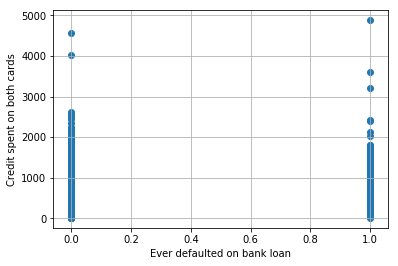

In [27]:
plt.grid()
plt.scatter(data['default'],target_variable)
plt.xlabel('Ever defaulted on bank loan')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

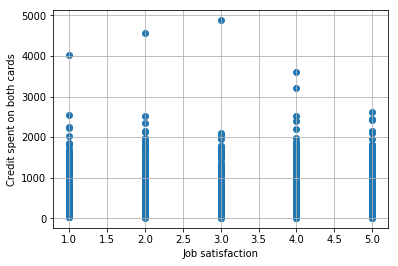

In [28]:
plt.grid()
plt.scatter(data['jobsat'],target_variable)
plt.xlabel('Job satisfaction')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

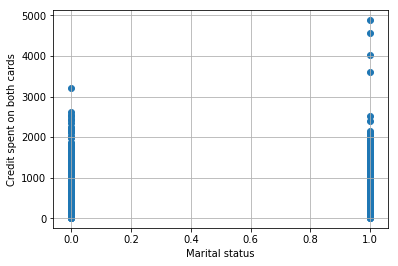

In [29]:
plt.grid()
plt.scatter(data['marital'],target_variable)
plt.xlabel('Marital status')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

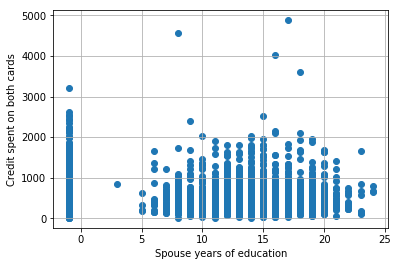

In [30]:
plt.grid()
plt.scatter(data['spoused'],target_variable)
plt.xlabel('Spouse years of education')
plt.ylabel('Credit spent on both cards')

In [31]:
data['spoused'].value_counts()

-1.0     2596
 13.0     270
 14.0     267
 15.0     257
 12.0     250
 16.0     250
 11.0     233
 17.0     188
 10.0     141
 18.0     116
 9.0      106
 19.0      90
 8.0       70
 20.0      59
 7.0       36
 21.0      20
 6.0       14
 22.0      14
 23.0       9
 5.0        4
 24.0       3
 3.0        1
Name: spoused, dtype: int64

Text(0,0.5,'Credit spent on both cards')

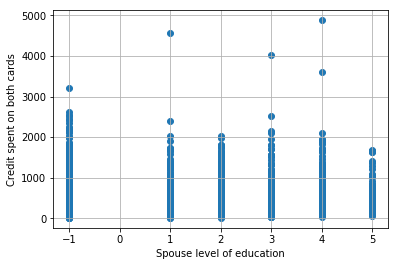

In [32]:
plt.grid()
plt.scatter(data['spousedcat'],target_variable)
plt.xlabel('Spouse level of education')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

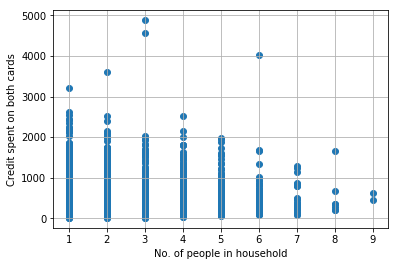

In [33]:
plt.grid()
plt.scatter(data['reside'],target_variable)
plt.xlabel('No. of people in household')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

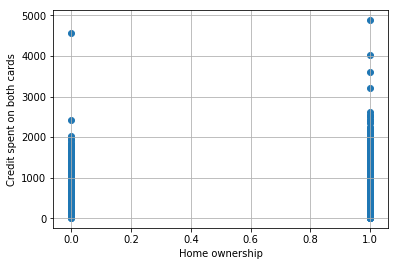

In [34]:
plt.grid()
plt.scatter(data['homeown'],target_variable)
plt.xlabel('Home ownership')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

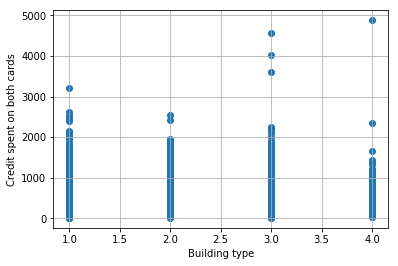

In [35]:
plt.grid()
plt.scatter(data['hometype'],target_variable)
plt.xlabel('Building type')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

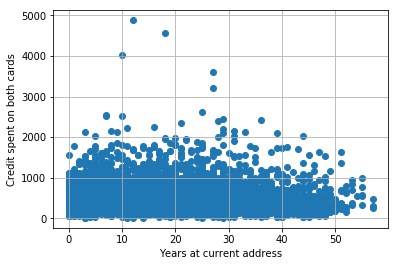

In [36]:
plt.grid()
plt.scatter(data['address'],target_variable)
plt.xlabel('Years at current address')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

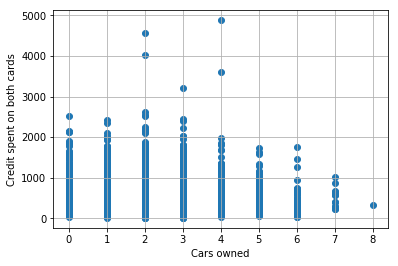

In [37]:
plt.grid()
plt.scatter(data['cars'],target_variable)
plt.xlabel('Cars owned')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

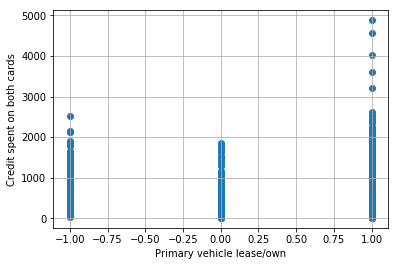

In [38]:
plt.grid()
plt.scatter(data['carown'],target_variable)
plt.xlabel('Primary vehicle lease/own')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

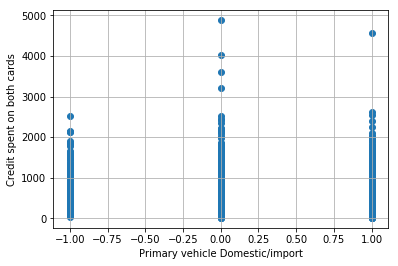

In [39]:
plt.grid()
plt.scatter(data['cartype'],target_variable)
plt.xlabel('Primary vehicle Domestic/import')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

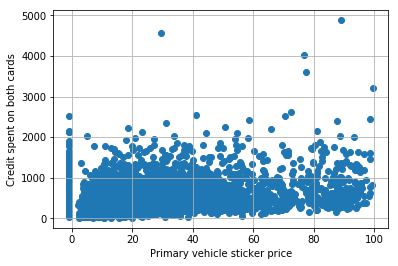

In [40]:
plt.grid()
plt.scatter(data['carvalue'],target_variable)
plt.xlabel('Primary vehicle sticker price')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

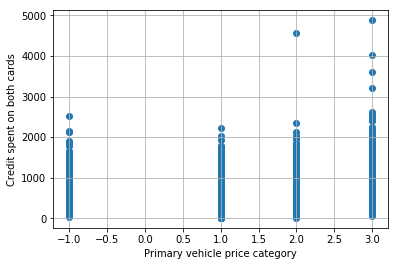

In [41]:
plt.grid()
plt.scatter(data['carcatvalue'],target_variable)
plt.xlabel('Primary vehicle price category')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

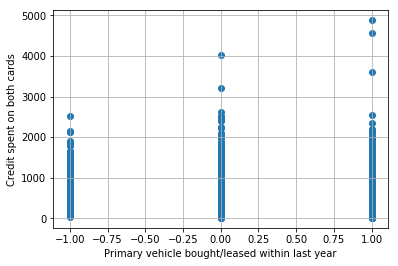

In [42]:
plt.grid()
plt.scatter(data['carbought'],target_variable)
plt.xlabel('Primary vehicle bought/leased within last year')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

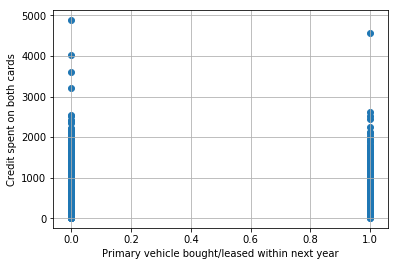

In [43]:
plt.grid()
plt.scatter(data['carbuy'],target_variable)
plt.xlabel('Primary vehicle bought/leased within next year')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

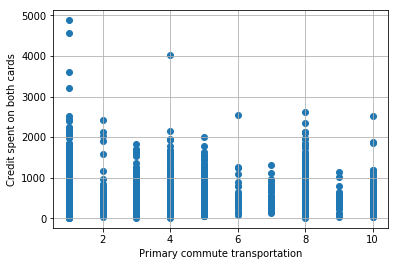

In [44]:
plt.grid()
plt.scatter(data['commute'],target_variable)
plt.xlabel('Primary commute transportation')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

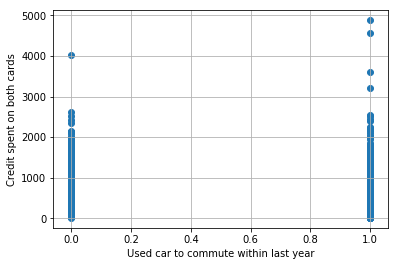

In [45]:
plt.grid()
plt.scatter(data['commutecar'],target_variable)
plt.xlabel('Used car to commute within last year')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

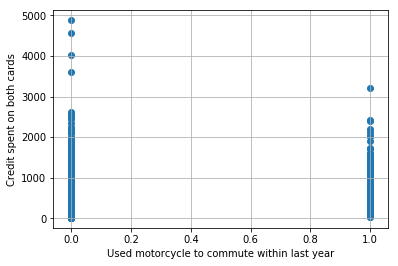

In [46]:
plt.grid()
plt.scatter(data['commutemotorcycle'],target_variable)
plt.xlabel('Used motorcycle to commute within last year')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

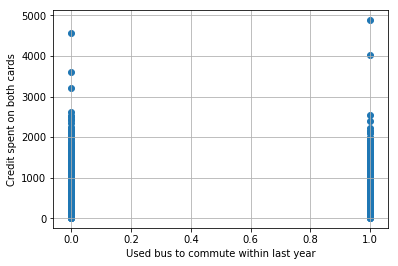

In [47]:
plt.grid()
plt.scatter(data['commutebus'],target_variable)
plt.xlabel('Used bus to commute within last year')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

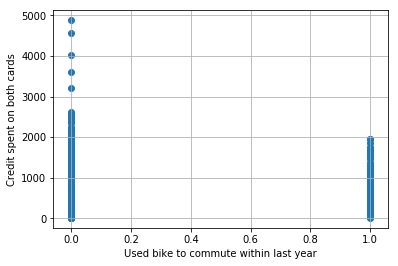

In [48]:
plt.grid()
plt.scatter(data['commutebike'],target_variable)
plt.xlabel('Used bike to commute within last year')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

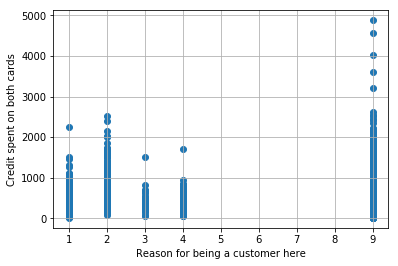

In [49]:
plt.grid()
plt.scatter(data['reason'],target_variable)
plt.xlabel('Reason for being a customer here')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

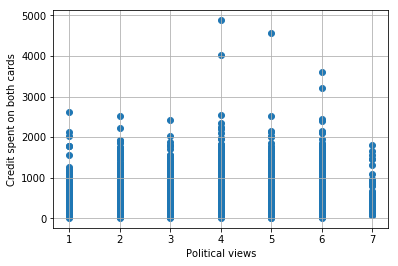

In [50]:
plt.grid()
plt.scatter(data['polview'],target_variable)
plt.xlabel('Political views')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

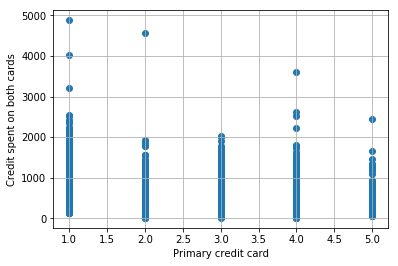

In [51]:
plt.grid()
plt.scatter(data['card'],target_variable)
plt.xlabel('Primary credit card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

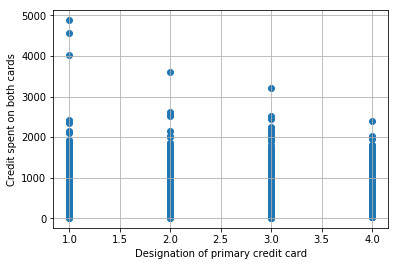

In [52]:
plt.grid()
plt.scatter(data['cardtype'],target_variable)
plt.xlabel('Designation of primary credit card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

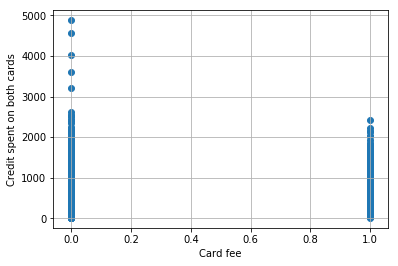

In [53]:
plt.grid()
plt.scatter(data['cardfee'],target_variable)
plt.xlabel('Card fee')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

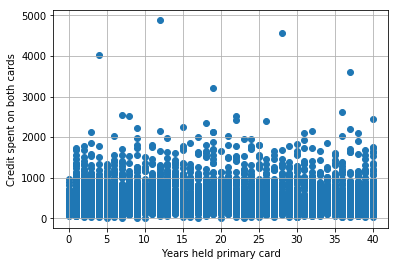

In [54]:
plt.grid()
plt.scatter(data['cardtenure'],target_variable)
plt.xlabel('Years held primary card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

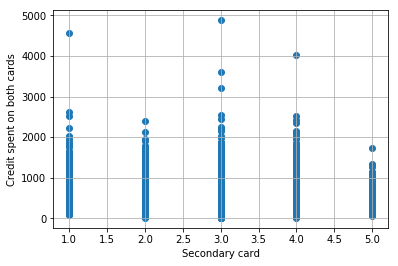

In [55]:
plt.grid()
plt.scatter(data['card2'],target_variable)
plt.xlabel('Secondary card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

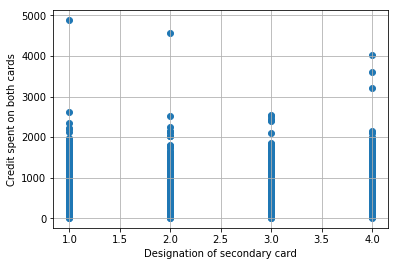

In [56]:
plt.grid()
plt.scatter(data['card2type'],target_variable)
plt.xlabel('Designation of secondary card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

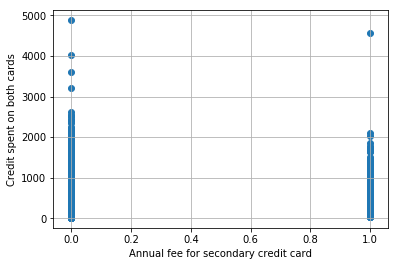

In [57]:
plt.grid()
plt.scatter(data['card2fee'],target_variable)
plt.xlabel('Annual fee for secondary credit card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

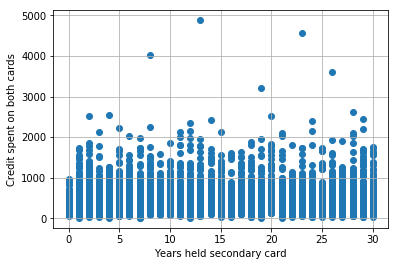

In [58]:
plt.grid()
plt.scatter(data['card2tenure'],target_variable)
plt.xlabel('Years held secondary card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

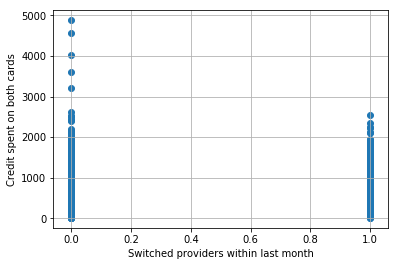

In [59]:
plt.grid()
plt.scatter(data['churn'],target_variable)
plt.xlabel('Switched providers within last month')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

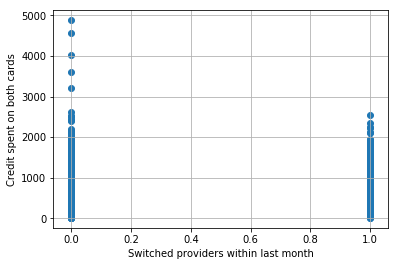

In [60]:
plt.grid()
plt.scatter(data['churn'],target_variable)
plt.xlabel('Switched providers within last month')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

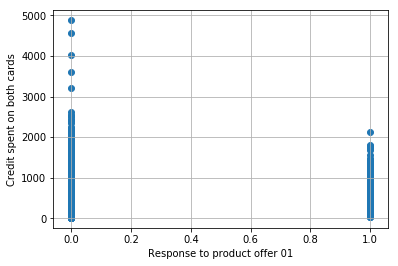

In [61]:
plt.grid()
plt.scatter(data['response_01'],target_variable)
plt.xlabel('Response to product offer 01')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

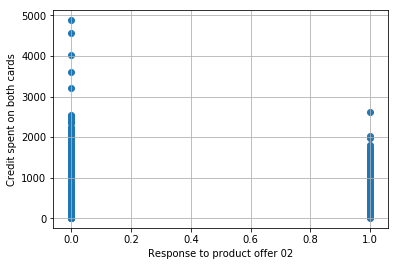

In [62]:
plt.grid()
plt.scatter(data['response_02'],target_variable)
plt.xlabel('Response to product offer 02')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

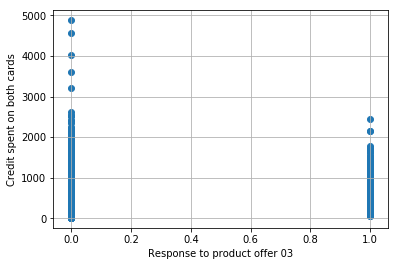

In [63]:
plt.grid()
plt.scatter(data['response_03'],target_variable)
plt.xlabel('Response to product offer 03')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

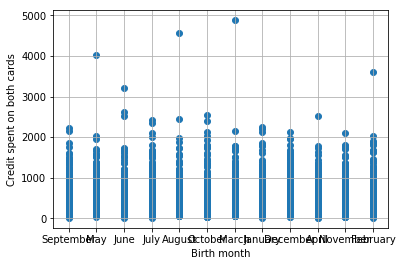

In [64]:
plt.grid()
plt.scatter(data['birthmonth'],target_variable)
plt.xlabel('Birth month')
plt.ylabel('Credit spent on both cards')

In [19]:
data.shape

(4994, 122)

#### Decile Analysis


In [35]:
q1=data_num.quantile(0.10)
data_num[data_num[q1.index]<q1].describe().T

,count,mean,std,min,25%,50%,75%,max
age,438.0,19.942922,1.444292,18.000000,19.000000,20.000000,21.000000,22.000000
ed,324.0,8.404321,0.762987,6.000000,8.000000,9.000000,9.000000,9.000000
income,460.0,12.084783,2.154032,9.000000,10.000000,12.000000,14.000000,15.000000
lninc,460.0,2.475326,0.182825,2.200000,2.300000,2.480000,2.640000,2.710000
debtinc,478.0,1.735983,0.688847,0.100000,1.200000,1.900000,2.300000,2.700000
creddebt,496.0,0.097298,0.046262,0.000000,0.060000,0.100000,0.140000,0.170000
othdebt,497.0,0.276237,0.110937,0.020000,0.200000,0.290000,0.370000,0.450000
spoused,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reside,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pets,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Feature Selection From Categorical Variables

In [36]:
data_cat=data[cat].join(target_variable)

In [37]:
data_cat=data_cat.loc[df.index]

In [38]:
data_cat.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,target_variable
custid,,,,,,,,,,,,,,,,,,,,,
4459-VLPQUH-3OL,4.0,3.00,0.0,2.0,May,3.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
9124-DZALHM-S6I,2.0,3.00,1.0,6.0,October,2.0,1.0,0.0,15.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,467.83
3512-MUWBGY-52X,2.0,2.00,0.0,4.0,July,1.0,6.0,0.0,19.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.81
8241-PWPONH-62O,2.0,4.00,1.0,3.0,October,1.0,2.0,0.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393.43
1705-NMIQNO-IC4,3.0,2.00,0.0,5.0,January,4.0,1.0,0.0,3.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,978.44


In [39]:
import scipy.stats as stats
final_cat=list()
for catg in cat:
    if type(data_cat[catg][0])==str:
        pass
    else:
#         print(catg)
        f=stats.f_oneway(data_cat[catg],data_cat['target_variable'])
        if f.pvalue<=0.05:
            final_cat.append(catg)

In [40]:
final_num=list()
for num in df.columns:
    if num=='target_variable':
        pass
    else:
        f=stats.pearsonr(df[num],df['target_variable'])
        if f[1]<=0.05:
            final_num.append(num)

C:\Users\adity\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\adity\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [41]:
final_num

['ed',
 'income',
 'lninc',
 'creddebt',
 'othdebt',
 'carvalue',
 'carditems',
 'card2items']

In [42]:
df=pd.DataFrame(df[final_num])
final_df=df.join(data_cat[final_cat])

In [96]:
# target_variable=final_df['target_variable']
# final_df.drop(columns={'target_variable'},axis=1,inplace=True)

In [43]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(final_df,data_cat['target_variable'],test_size=0.2,random_state=0)

C:\Users\adity\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
# from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [59]:
# Recursive Feature Elimination


# create a base classifier used to evaluate a subset of attributes
model = RandomForestRegressor(n_estimators=100,n_jobs=-1)
X, y = X_train, y_train
# create the RFE model and select 40 attributes
model.fit(X,y)

# # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [75]:
# features=(rfe.support_).tolist()
# tot_features=data.columns
# indices=list()
# for i in range(len(features)):
#     if features[i]==True:
#         indices.append(i)
# tot_features[indices]

In [60]:
y_pred=model.predict(X_test)

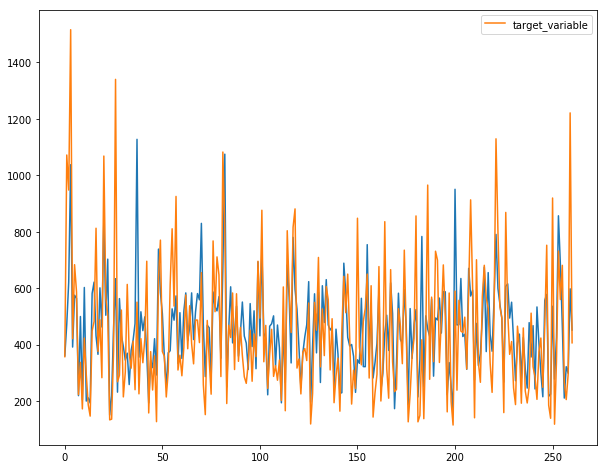

In [61]:
plt.figure(figsize=(10,8))
plt.plot(range(len(y_pred)),y_pred)
plt.plot(range(len(y_test)),y_test)
plt.legend()

C:\Users\adity\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


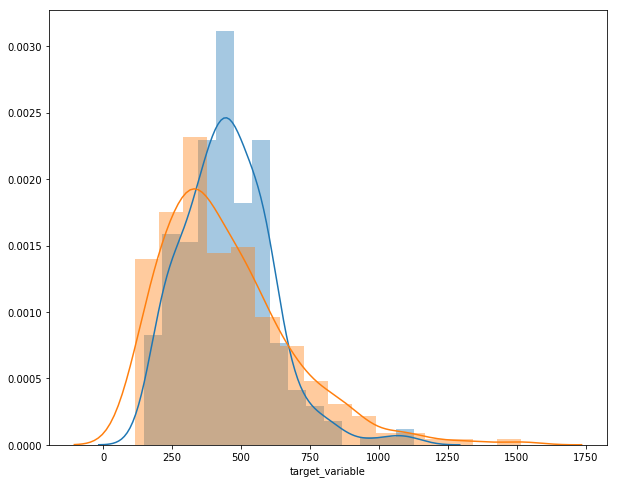

In [62]:
plt.figure(figsize=(10,8))
sns.distplot(y_pred)
sns.distplot(y_test)

In [63]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

29160.37001579909

In [64]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,scoring="mean_squared_error",cv=5)
scores.mean()

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\adity\Anaconda3\lib\sit

-43973.27301736378

In [65]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.4642113606968431

In [66]:
y_pred=pd.DataFrame(data=y_pred,index=X_test.index)

In [74]:
y_pred.to_csv('Results.csv')

# Tensorflow Implementation

In [55]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [56]:
model = build_model()

In [57]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [58]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,1830.970652,30.531096,1830.970652,89581.143279,205.489528,89581.143279,995
996,1628.629569,30.944689,1628.629569,94973.778035,214.158978,94973.778035,996
997,1467.546963,28.411350,1467.546963,83999.215946,194.605485,83999.215946,997
998,1804.891976,31.387097,1804.891976,96806.349581,217.838892,96806.349581,998
999,1467.859965,26.938156,1467.859965,89559.129560,203.203535,89559.129560,999


In [67]:
# def plot_history(history):
#       hist = pd.DataFrame(history.history)
#       hist['epoch'] = history.epoch
  
#       plt.figure()
#       plt.xlabel('Epoch')
#       plt.ylabel('Mean Abs Error [MPG]')
#       plt.plot(hist['epoch'], hist['mean_absolute_error'],
#         label='Train Error')
#       plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
#            label = 'Val Error')
#       plt.ylim([0,5])
#       plt.legend()
  
#       plt.figure()
#       plt.xlabel('Epoch')
#       plt.ylabel('Mean Square Error [$MPG^2$]')
#       plt.plot(hist['epoch'], hist['mean_squared_error'],
#                label='Train Error')
#       plt.plot(hist['epoch'], hist['val_mean_squared_error'],
#                label = 'Val Error')
#       plt.ylim([0,20])
#       plt.legend()
#       plt.show()


# plot_history(history)


In [64]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))


Testing set Mean Abs Error: 172.27 MPG


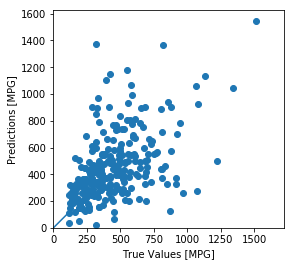

In [65]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

#### Important Features

In [107]:
final_num

['ed',
 'income',
 'lninc',
 'creddebt',
 'othdebt',
 'carvalue',
 'carditems',
 'card2items']

In [108]:
final_cat

['region',
 'gender',
 'agecat',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'default',
 'jobsat',
 'marital',
 'spousedcat',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'active',
 'bfast',
 'churn',
 'tollfree',
 'equip',
 'callcard',
 'wireless',
 'multline',
 'voice',
 'pager',
 'internet',
 'callid',
 'callwait',
 'forward',
 'confer',
 'ebill',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownpc',
 'ownipod',
 'owngame',
 'ownfax',
 'ne

### i-i-i-i-i--i-i-i-i--------------------------------------------------------------

### Insights and Observations from the data
* Given a high dimensional data, variables which seemed to be important for credit card card spend were analysed.
* People with rather high income did not have large expenditure on credit card except a few outliers.
* People with 13-14 years of education were found to be spending more on their credit cards as compared to those with less or rather many years of education.
* Job category did not really affect the spending of customers, except a few outliers in category 6.
* Customers who were not union members were found to be spending slightly more than those who were members.
* Customers who were retired tend to spend less on their credit cards.
* Credit spent on cards seemed to be decreasing with increase in number of years of service with the same employer.
* Customers with high Debt to income ratio(%) spent way less on their credit cards as compared to those with low Debt to income ratio.
* Customers with low credit card debt spent more as compared to those with high debt. But not many customers had a very high debt except a few outliers.
* Marital status of customers did not really affect the spend on credit cards except a few outliers.
* Customers with less number of people in household tend to spend more particularly customers who were alone.
* Political views had a neutral affect on credit card spend barring highly conserative people who were found to be spending slighly less than others.
* Customers who were not being charged a card fee were found to be spending more.
* Customers who did not receive any of the 3 product offers were found to be spending more as compared to those who received offers.